In [11]:
#https://towardsdatascience.com/introduction-to-decision-tree-classifiers-from-scikit-learn-32cd5d23f4d

import pandas as pd
import numpy as np

#load in the data

dataframeA = pd.read_csv('5. Dataset Feature Dropping/MeterA_featureSelection.csv')
#display(dataframeA.head())
dataframeA.head()

dataframeA = dataframeA.drop('Unnamed: 0', axis=1)

# yLbl is Class Attruibute labels

yLbl = dataframeA[['Class Attruibute']]

#featuresVector
dataframeA

,Flatness ratio,Symmetry,Crossflow,Average speed of sound,Average Gain,Class Attruibute
0,0.841499,1.009367,0.993816,1485.391229,35.064189,1
1,0.842250,1.006584,0.996605,1485.919896,34.975281,1
2,0.840723,1.011647,0.998152,1485.903146,34.920553,1
3,0.841119,1.017807,0.996812,1484.790938,34.878133,1
4,0.840358,1.016534,0.996221,1484.252875,34.882507,1
...,...,...,...,...,...,...
78,0.792929,1.006295,0.999666,1484.645292,34.725749,2
79,0.792309,1.004472,0.999873,1484.581813,34.726258,2
80,0.793471,1.009560,1.001110,1484.530583,34.729004,2
81,0.796730,1.010570,0.999029,1484.473917,34.728801,2


In [12]:
dataframeA['Class Attruibute'] = dataframeA['Class Attruibute'].replace([1],'Healthy')
dataframeA['Class Attruibute'] = dataframeA['Class Attruibute'].replace([2],'Installation effects')
dataframeA

,Flatness ratio,Symmetry,Crossflow,Average speed of sound,Average Gain,Class Attruibute
0,0.841499,1.009367,0.993816,1485.391229,35.064189,Healthy
1,0.842250,1.006584,0.996605,1485.919896,34.975281,Healthy
2,0.840723,1.011647,0.998152,1485.903146,34.920553,Healthy
3,0.841119,1.017807,0.996812,1484.790938,34.878133,Healthy
4,0.840358,1.016534,0.996221,1484.252875,34.882507,Healthy
...,...,...,...,...,...,...
78,0.792929,1.006295,0.999666,1484.645292,34.725749,Installation effects
79,0.792309,1.004472,0.999873,1484.581813,34.726258,Installation effects
80,0.793471,1.009560,1.001110,1484.530583,34.729004,Installation effects
81,0.796730,1.010570,0.999029,1484.473917,34.728801,Installation effects


In [17]:
from sklearn import tree

#Y = data['Class']
#X = data.drop(['Name','Class'],axis=1)

#clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
#clf = clf.fit(X, Y)

#extract features and target variables
x = dataframeA.drop(columns="Class Attruibute")
y = dataframeA["Class Attruibute"]
#save the feature name and target variables
feature_names = x.columns
labels = y.unique()

#split the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(x,y,
                                                 test_size = 0.3,
                                                 random_state = 42)

print(x)

print(y)

    Flatness ratio  Symmetry  Crossflow  Average speed of sound  Average Gain
0         0.841499  1.009367   0.993816             1485.391229     35.064189
1         0.842250  1.006584   0.996605             1485.919896     34.975281
2         0.840723  1.011647   0.998152             1485.903146     34.920553
3         0.841119  1.017807   0.996812             1484.790938     34.878133
4         0.840358  1.016534   0.996221             1484.252875     34.882507
..             ...       ...        ...                     ...           ...
78        0.792929  1.006295   0.999666             1484.645292     34.725749
79        0.792309  1.004472   0.999873             1484.581813     34.726258
80        0.793471  1.009560   1.001110             1484.530583     34.729004
81        0.796730  1.010570   0.999029             1484.473917     34.728801
82        0.790194  1.004195   0.995537             1484.387167     34.716899

[83 rows x 5 columns]
0                  Healthy
1             

In [18]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

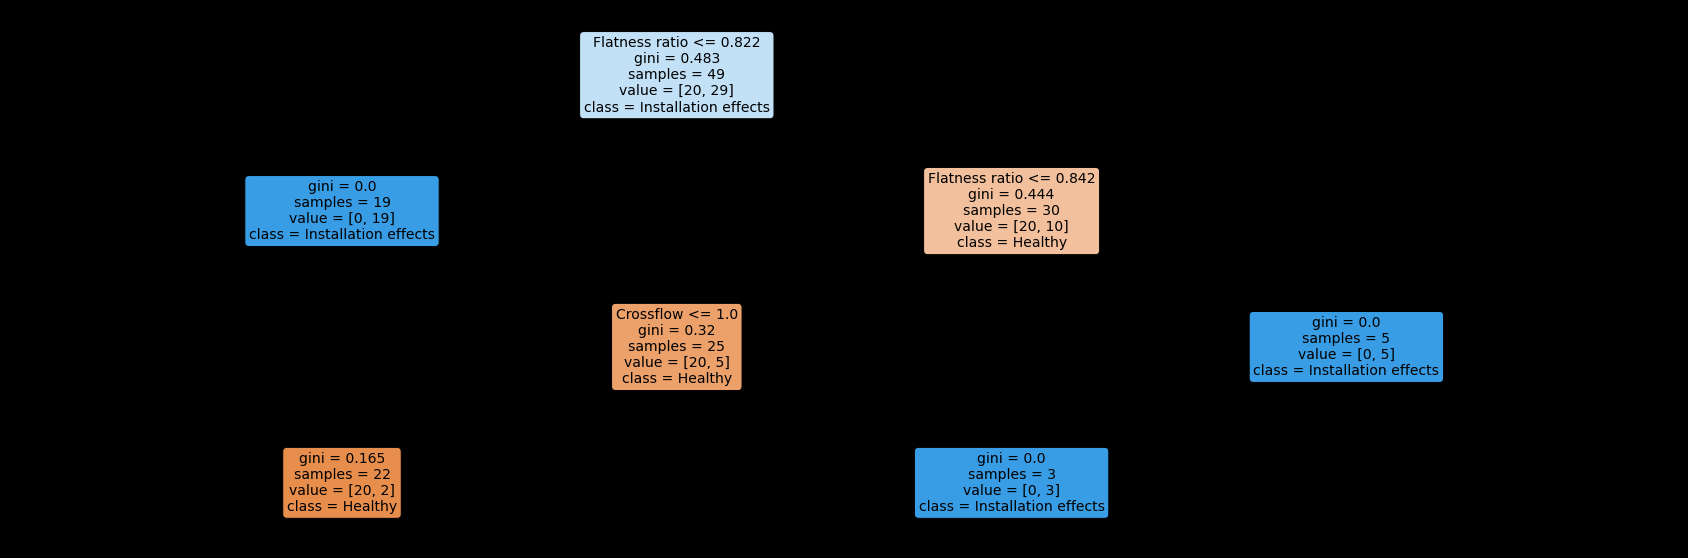

In [19]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()


In [20]:
# As a text based diagram
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
print(tree_rules)

|--- Flatness ratio <= 0.82
|   |--- class: Installation effects
|--- Flatness ratio >  0.82
|   |--- Flatness ratio <= 0.84
|   |   |--- Crossflow <= 1.00
|   |   |   |--- class: Healthy
|   |   |--- Crossflow >  1.00
|   |   |   |--- class: Installation effects
|   |--- Flatness ratio >  0.84
|   |   |--- class: Installation effects



In [22]:
#predict the class from the test values
test_pred_decision_tree = clf.predict(test_x)

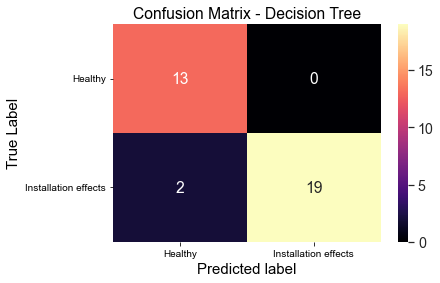

<Figure size 720x504 with 0 Axes>

In [24]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [25]:
metrics.accuracy_score(test_lab, test_pred_decision_tree)

0.9411764705882353

In [26]:
#get the precision score
precision = metrics.precision_score(test_lab,
                                   test_pred_decision_tree, 
                                   average=None)
#turn it into a dataframe
precision_results = pd.DataFrame(precision, index=labels)
#rename the results column
precision_results.rename(columns={0:'precision'}, inplace =True)
precision_results

,precision
Healthy,0.866667
Installation effects,1.000000


In [27]:
recall = metrics.recall_score(test_lab, test_pred_decision_tree, 
                              average =None)
recall_results = pd.DataFrame(recall, index= labels)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
recall_results

,Recall
Healthy,1.000000
Installation effects,0.904762


In [30]:
print(metrics.classification_report(test_lab,
                                    test_pred_decision_tree))

                      precision    recall  f1-score   support

             Healthy       0.87      1.00      0.93        13
Installation effects       1.00      0.90      0.95        21

            accuracy                           0.94        34
           macro avg       0.93      0.95      0.94        34
        weighted avg       0.95      0.94      0.94        34



calculating the importance of each of the features in the final tree output. This is the total amount that the gini index or entropy index (gini in our case) decreases due to splits over a given feature.

In [31]:
#extract importance
importance = pd.DataFrame({'feature': X_train.columns, 
'importance' : np.round(clf.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

                  feature  importance
0          Flatness ratio       0.782
2               Crossflow       0.218
1                Symmetry       0.000
3  Average speed of sound       0.000
4            Average Gain       0.000


# Improving the model

In [32]:

from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'max_depth': [1,2,3,4,5], 
                     'min_samples_split': [2,4,6,8,10]}]
scores = ['recall']
for score in scores:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters,
        scoring = f'{score}_macro'
    )
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 clf.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 5, 'min_samples_split': 4}

Grid scores on development set:
0.827 (+/-0.109) for {'max_depth': 1, 'min_samples_split': 2}
0.827 (+/-0.109) for {'max_depth': 1, 'min_samples_split': 4}
0.827 (+/-0.109) for {'max_depth': 1, 'min_samples_split': 6}
0.827 (+/-0.109) for {'max_depth': 1, 'min_samples_split': 8}
0.827 (+/-0.109) for {'max_depth': 1, 'min_samples_split': 10}
0.888 (+/-0.193) for {'max_depth': 2, 'min_samples_split': 2}
0.888 (+/-0.193) for {'max_depth': 2, 'min_samples_split': 4}
0.888 (+/-0.193) for {'max_depth': 2, 'min_samples_split': 6}
0.888 (+/-0.193) for {'max_depth': 2, 'min_samples_split': 8}
0.888 (+/-0.193) for {'max_depth': 2, 'min_samples_split': 10}
0.883 (+/-0.309) for {'max_depth': 3, 'min_samples_split': 2}
0.925 (+/-0.153) for {'max_depth': 3, 'min_samples_split': 4}
0.883 (+/-0.309) for {'max_depth': 3, 'min_samples_split': 6}
0.925 (+/-0.153) for {'max_depth': 

# For Meter B

In [33]:
#load in the data

dataframeB = pd.read_csv('5. Dataset Feature Dropping/MeterB_featureSelection.csv')
#display(dataframeA.head())
dataframeB.head()

dataframeB = dataframeB.drop('Unnamed: 0', axis=1)

# yLbl is Class Attruibute labels

yLbl_B = dataframeB[['Class Attruibute']]

#featuresVector
dataframeB

,Profile factor,Symmetry,Crossflow,Swirl Angle,Average flow velocity,Average speed of sound,Average Signal Strength,Meter performance,Average Gain,Average Transit Time,Class Attruibute
0,1.185089,1.028128,1.016478,0.150000,2.394439,1485.153222,4883.004861,100.000000,51.475,102.135383,1
1,1.191806,1.033750,1.019411,0.217000,2.396089,1485.030722,4880.964583,100.000000,51.475,102.143804,1
2,1.181983,1.028089,1.020994,0.088900,3.523517,1485.061111,4859.806944,100.000000,51.475,102.141860,1
3,1.182761,1.028783,1.021072,0.117000,3.525933,1485.131278,4857.486806,100.000000,51.475,102.137063,1
4,1.182272,1.028922,1.021350,0.022200,3.525128,1485.103278,4855.343056,100.000000,51.475,102.139019,1
...,...,...,...,...,...,...,...,...,...,...,...
63,1.223150,1.148861,1.045761,0.900000,6.193783,1505.746167,4127.178917,95.494444,63.550,100.910399,3
64,1.228539,1.147172,1.047439,0.794000,6.189289,1505.570500,4167.576833,94.833333,63.550,100.922170,3
65,1.229144,1.153189,1.053000,0.856000,6.199967,1505.559500,4200.289703,94.966667,63.550,100.922789,3
66,1.232594,1.152072,1.053156,0.988889,6.202361,1505.734444,4208.116951,95.366667,63.550,100.910299,3


In [34]:
dataframeB['Class Attruibute'] = dataframeB['Class Attruibute'].replace([1],'Healthy')
dataframeB['Class Attruibute'] = dataframeB['Class Attruibute'].replace([2],'Gas injection')
dataframeB['Class Attruibute'] = dataframeB['Class Attruibute'].replace([3],'Waxing')
dataframeB

,Profile factor,Symmetry,Crossflow,Swirl Angle,Average flow velocity,Average speed of sound,Average Signal Strength,Meter performance,Average Gain,Average Transit Time,Class Attruibute
0,1.185089,1.028128,1.016478,0.150000,2.394439,1485.153222,4883.004861,100.000000,51.475,102.135383,Healthy
1,1.191806,1.033750,1.019411,0.217000,2.396089,1485.030722,4880.964583,100.000000,51.475,102.143804,Healthy
2,1.181983,1.028089,1.020994,0.088900,3.523517,1485.061111,4859.806944,100.000000,51.475,102.141860,Healthy
3,1.182761,1.028783,1.021072,0.117000,3.525933,1485.131278,4857.486806,100.000000,51.475,102.137063,Healthy
4,1.182272,1.028922,1.021350,0.022200,3.525128,1485.103278,4855.343056,100.000000,51.475,102.139019,Healthy
...,...,...,...,...,...,...,...,...,...,...,...
63,1.223150,1.148861,1.045761,0.900000,6.193783,1505.746167,4127.178917,95.494444,63.550,100.910399,Waxing
64,1.228539,1.147172,1.047439,0.794000,6.189289,1505.570500,4167.576833,94.833333,63.550,100.922170,Waxing
65,1.229144,1.153189,1.053000,0.856000,6.199967,1505.559500,4200.289703,94.966667,63.550,100.922789,Waxing
66,1.232594,1.152072,1.053156,0.988889,6.202361,1505.734444,4208.116951,95.366667,63.550,100.910299,Waxing


In [48]:
#Y = data['Class']
#X = data.drop(['Name','Class'],axis=1)

#clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
#clf = clf.fit(X, Y)

#extract features and target variables
x_B = dataframeB.drop(columns="Class Attruibute")
y_B = dataframeB["Class Attruibute"]
#save the feature name and target variables
feature_names_B = x_B.columns
labels_B = y_B.unique()

#split the dataset
X_train_B, test_x_B, y_train_B, test_lab_B = train_test_split(x_B,y_B,
                                                 test_size = 0.3,
                                                 random_state = 42)

In [49]:
clf_B = DecisionTreeClassifier(max_depth = 3, random_state = 42)
clf_B.fit(X_train_B, y_train_B)

DecisionTreeClassifier(max_depth=3, random_state=42)

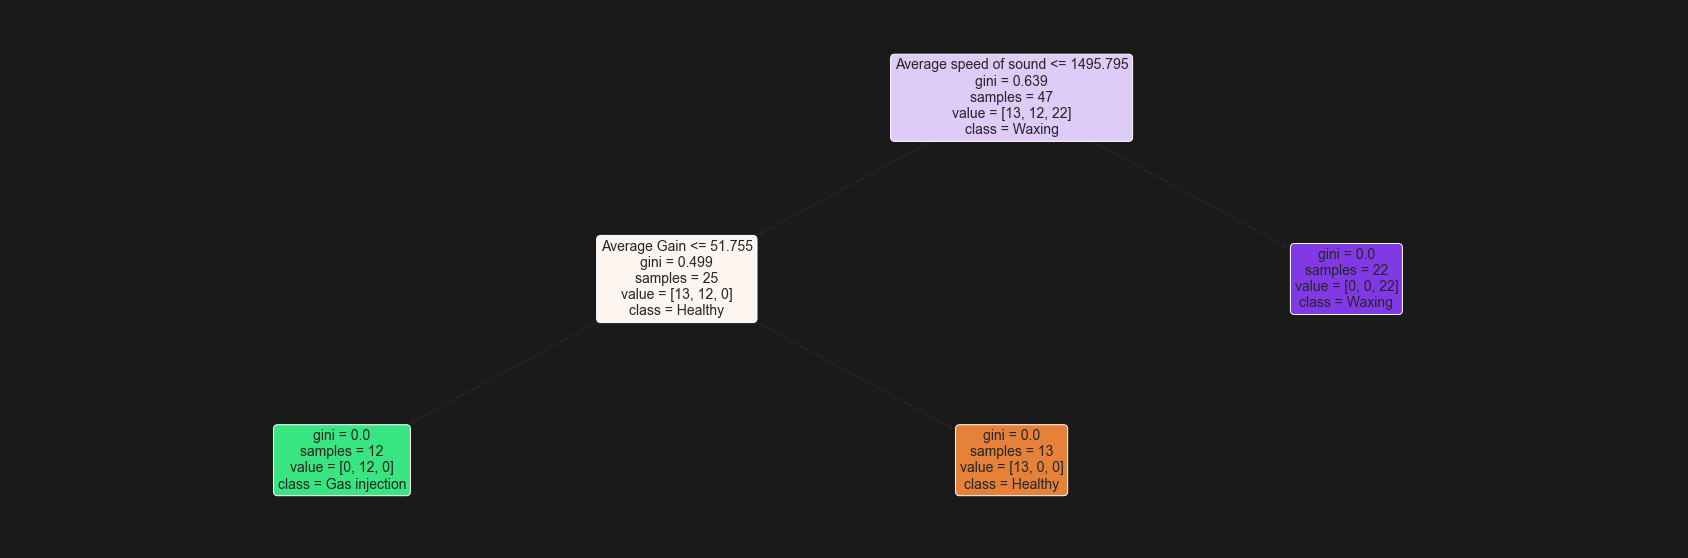

In [50]:
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(clf_B,
                   #use the feature names stored
                   feature_names = feature_names_B,
                   #use the class names stored
                   class_names = labels_B,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [51]:
# As a text based diagram
#import relevant functions
#export the decision rules
tree_rules_B = export_text(clf_B,
                        feature_names = list(feature_names_B))
#print the result
print(tree_rules_B)

|--- Average speed of sound <= 1495.80
|   |--- Average Gain <= 51.75
|   |   |--- class: Healthy
|   |--- Average Gain >  51.75
|   |   |--- class: Gas injection
|--- Average speed of sound >  1495.80
|   |--- class: Waxing



In [54]:
#predict the class from the test values
test_pred_decision_tree_B = clf_B.predict(test_x_B)


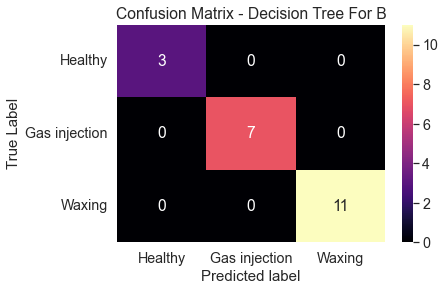

<Figure size 720x504 with 0 Axes>

In [56]:
#get the confusion matrix
confusion_matrix_B = metrics.confusion_matrix(test_lab_B,  
                                            test_pred_decision_tree_B)
#turn this into a dataframe
matrix_df_B = pd.DataFrame(confusion_matrix_B)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df_B, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree For B')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels_B)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels_B), rotation = 0)
plt.show()

In [57]:
metrics.accuracy_score(test_lab_B, test_pred_decision_tree_B)

1.0

In [58]:
#get the precision score
precision_B = metrics.precision_score(test_lab_B,
                                   test_pred_decision_tree_B, 
                                   average=None)
#turn it into a dataframe
precision_results_B = pd.DataFrame(precision_B, index=labels_B)
#rename the results column
precision_results_B.rename(columns={0:'precision for B'}, inplace =True)
precision_results_B

,precision for B
Healthy,1.0
Gas injection,1.0
Waxing,1.0


In [59]:
recall_B = metrics.recall_score(test_lab_B, test_pred_decision_tree_B, 
                              average =None)
recall_results_B = pd.DataFrame(recall_B, index= labels_B)
recall_results_B.rename(columns ={0:'Recall For B'}, inplace =True)
recall_results_B

,Recall For B
Healthy,1.0
Gas injection,1.0
Waxing,1.0


In [60]:
print(metrics.classification_report(test_lab_B,
                                    test_pred_decision_tree_B))

               precision    recall  f1-score   support

Gas injection       1.00      1.00      1.00         3
      Healthy       1.00      1.00      1.00         7
       Waxing       1.00      1.00      1.00        11

     accuracy                           1.00        21
    macro avg       1.00      1.00      1.00        21
 weighted avg       1.00      1.00      1.00        21



In [62]:
#extract importance
importance = pd.DataFrame({'feature': X_train_B.columns, 
'importance' : np.round(clf_B.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

                   feature  importance
5   Average speed of sound       0.585
8             Average Gain       0.415
0           Profile factor       0.000
1                 Symmetry       0.000
2                Crossflow       0.000
3              Swirl Angle       0.000
4    Average flow velocity       0.000
6  Average Signal Strength       0.000
7        Meter performance       0.000
9     Average Transit Time       0.000


In [64]:
tuned_parameters_B = [{'max_depth': [1,2,3,4,5], 
                     'min_samples_split': [2,4,6,8,10]}]
scores_B = ['recall']
for score in scores_B:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf_B = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters_B,
        scoring = f'{score}_macro'
    )
    clf_B.fit(X_train_B, y_train_B)
    
    print("Best parameters set found on development set:")
    print()
    print(clf_B.best_params_)
    print()
    print("Grid scores on development set B:")
    means = clf_B.cv_results_["mean_test_score"]
    stds = clf_B.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 clf_B.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall

Best parameters set found on development set:

{'max_depth': 2, 'min_samples_split': 2}

Grid scores on development set B:
0.650 (+/-0.067) for {'max_depth': 1, 'min_samples_split': 2}
0.650 (+/-0.067) for {'max_depth': 1, 'min_samples_split': 4}
0.644 (+/-0.089) for {'max_depth': 1, 'min_samples_split': 6}
0.667 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 8}
0.667 (+/-0.000) for {'max_depth': 1, 'min_samples_split': 10}
1.000 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 2}
0.939 (+/-0.159) for {'max_depth': 2, 'min_samples_split': 4}
1.000 (+/-0.000) for {'max_depth': 2, 'min_samples_split': 6}
0.978 (+/-0.089) for {'max_depth': 2, 'min_samples_split': 8}
0.956 (+/-0.109) for {'max_depth': 2, 'min_samples_split': 10}
0.956 (+/-0.109) for {'max_depth': 3, 'min_samples_split': 2}
0.961 (+/-0.097) for {'max_depth': 3, 'min_samples_split': 4}
0.956 (+/-0.109) for {'max_depth': 3, 'min_samples_split': 6}
1.000 (+/-0.000) for {'max_depth'

# For Meter C

In [108]:
#load in the data

dataframeC = pd.read_csv('5. Dataset Feature Dropping/MeterC_featureSelection.csv')
#display(dataframeA.head())
dataframeC.head()

dataframeC = dataframeC.drop('Unnamed: 0', axis=1)

# yLbl is Class Attruibute labels

yLbl_C = dataframeC[['Class Attruibute']]

#featuresVector
dataframeC

,Profile factor,Symmetry,Crossflow,Average Flow Velocity,Average Gain,Average Signal Quality,Average Signal Strength,Class Attruibute
0,1.102690,1.004425,1.006741,15.917361,15.109722,3156.708333,61.75,1
1,1.101432,1.003722,1.008256,14.729722,15.100000,3205.243056,61.75,1
2,1.098568,1.002528,1.009103,14.743750,15.100000,3211.961806,61.75,1
3,1.099516,1.007024,1.009363,14.724167,15.100000,3216.180556,61.75,1
4,1.100336,1.000661,1.006709,14.705417,15.100000,3197.750000,61.75,1
...,...,...,...,...,...,...,...,...
130,1.106850,0.993131,1.003427,5.520972,15.150000,3425.965278,61.75,4
131,1.106124,0.994477,1.002730,9.779583,15.150000,3334.135417,61.75,4
132,1.103042,0.996682,1.003806,12.285417,15.150000,3266.739583,61.75,4
133,1.110915,0.995059,1.007858,13.432014,15.150000,3228.552083,61.75,4


In [109]:
dataframeC['Class Attruibute'] = dataframeC['Class Attruibute'].replace([1],'Healthy')
dataframeC['Class Attruibute'] = dataframeC['Class Attruibute'].replace([2],'Gas injection')
dataframeC['Class Attruibute'] = dataframeC['Class Attruibute'].replace([3],'Installation effects')
dataframeC['Class Attruibute'] = dataframeC['Class Attruibute'].replace([4],'Waxing')

dataframeC

,Profile factor,Symmetry,Crossflow,Average Flow Velocity,Average Gain,Average Signal Quality,Average Signal Strength,Class Attruibute
0,1.102690,1.004425,1.006741,15.917361,15.109722,3156.708333,61.75,Healthy
1,1.101432,1.003722,1.008256,14.729722,15.100000,3205.243056,61.75,Healthy
2,1.098568,1.002528,1.009103,14.743750,15.100000,3211.961806,61.75,Healthy
3,1.099516,1.007024,1.009363,14.724167,15.100000,3216.180556,61.75,Healthy
4,1.100336,1.000661,1.006709,14.705417,15.100000,3197.750000,61.75,Healthy
...,...,...,...,...,...,...,...,...
130,1.106850,0.993131,1.003427,5.520972,15.150000,3425.965278,61.75,Waxing
131,1.106124,0.994477,1.002730,9.779583,15.150000,3334.135417,61.75,Waxing
132,1.103042,0.996682,1.003806,12.285417,15.150000,3266.739583,61.75,Waxing
133,1.110915,0.995059,1.007858,13.432014,15.150000,3228.552083,61.75,Waxing


In [110]:
#extract features and target variables
x_C = dataframeC.drop(columns="Class Attruibute")
y_C = dataframeC["Class Attruibute"]
#save the feature name and target variables
feature_names_C = x_C.columns
labels_C = y_C.unique()

X_train_C, test_x_C, y_train_C, test_lab_C = train_test_split(x_C,y_C,
                                                 test_size = 0.3,
                                                 random_state = 42)

print(x_C)

print(y_C)

     Profile factor  Symmetry  Crossflow  Average Flow Velocity  Average Gain  \
0          1.102690  1.004425   1.006741              15.917361     15.109722   
1          1.101432  1.003722   1.008256              14.729722     15.100000   
2          1.098568  1.002528   1.009103              14.743750     15.100000   
3          1.099516  1.007024   1.009363              14.724167     15.100000   
4          1.100336  1.000661   1.006709              14.705417     15.100000   
..              ...       ...        ...                    ...           ...   
130        1.106850  0.993131   1.003427               5.520972     15.150000   
131        1.106124  0.994477   1.002730               9.779583     15.150000   
132        1.103042  0.996682   1.003806              12.285417     15.150000   
133        1.110915  0.995059   1.007858              13.432014     15.150000   
134        1.102931  0.990570   1.003295              13.427361     15.125000   

     Average Signal Quality

In [111]:
clf_C = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf_C.fit(X_train_C, y_train_C)

DecisionTreeClassifier(max_depth=3, random_state=42)

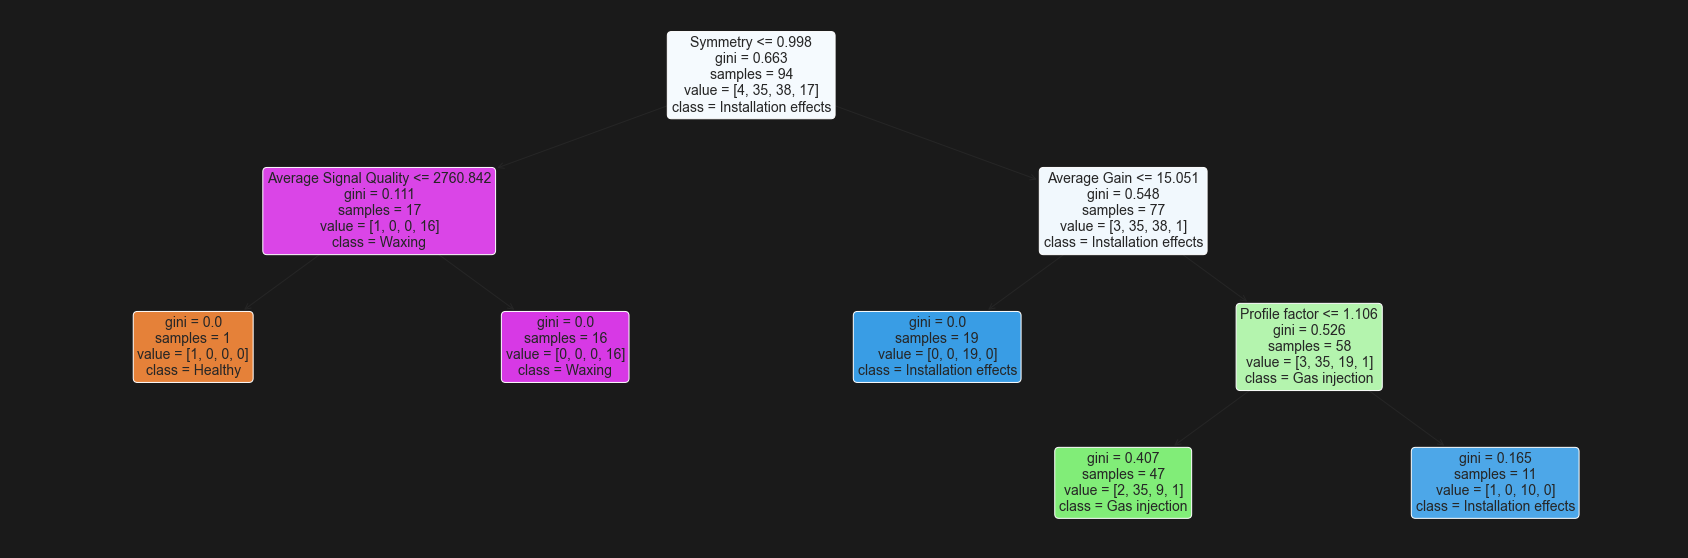

In [112]:
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(clf_C,
                   #use the feature names stored
                   feature_names = feature_names_C,
                   #use the class names stored
                   class_names = labels_C,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [113]:
# As a text based diagram
#export the decision rules
tree_rules_C = export_text(clf_C,
                        feature_names = list(feature_names_C))
#print the result    
print(tree_rules_C)

|--- Symmetry <= 1.00
|   |--- Average Signal Quality <= 2760.84
|   |   |--- class: Gas injection
|   |--- Average Signal Quality >  2760.84
|   |   |--- class: Waxing
|--- Symmetry >  1.00
|   |--- Average Gain <= 15.05
|   |   |--- class: Installation effects
|   |--- Average Gain >  15.05
|   |   |--- Profile factor <= 1.11
|   |   |   |--- class: Healthy
|   |   |--- Profile factor >  1.11
|   |   |   |--- class: Installation effects



In [114]:
#predict the class from the test values
test_pred_decision_tree_C = clf_C.predict(test_x_C)

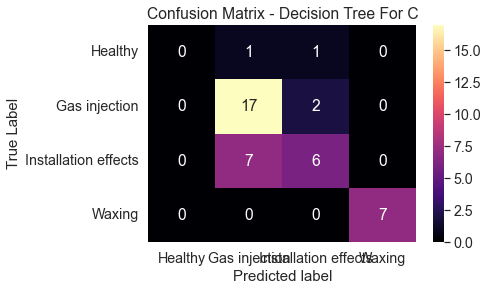

<Figure size 720x576 with 0 Axes>

In [115]:
#get the confusion matrix
confusion_matrix_C = metrics.confusion_matrix(test_lab_C,  
                                            test_pred_decision_tree_C)
#turn this into a dataframe
matrix_df_C = pd.DataFrame(confusion_matrix_C)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,8))
sns.heatmap(matrix_df_C, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree For C')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels_C)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels_C), rotation = 0)
plt.show()

In [116]:
metrics.accuracy_score(test_lab_C, test_pred_decision_tree_C)

0.7317073170731707

In [117]:
#get the precision score
precision_C = metrics.precision_score(test_lab_C,
                                   test_pred_decision_tree_C, 
                                   average=None)
#turn it into a dataframe
precision_results_C = pd.DataFrame(precision_C, index=labels_C)
#rename the results column
precision_results_C.rename(columns={0:'precision for C'}, inplace =True)
precision_results_C

C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision for C
Healthy,0.000000
Gas injection,0.680000
Installation effects,0.666667
Waxing,1.000000


In [95]:
recall_C = metrics.recall_score(test_lab_C, test_pred_decision_tree_C, 
                              average =None)
recall_results_C = pd.DataFrame(recall_C, index= labels_C)
recall_results_C.rename(columns ={0:'Recall For C'}, inplace =True)
recall_results_C

,Recall For C
Healthy,0.00
Gas injection,0.92
Installation effects,0.50
Waxing,1.00


In [96]:
print(metrics.classification_report(test_lab_C,
                                    test_pred_decision_tree_C))

                      precision    recall  f1-score   support

       Gas injection       0.00      0.00      0.00         2
             Healthy       0.70      0.92      0.79        25
Installation effects       0.75      0.50      0.60        18
              Waxing       1.00      1.00      1.00         9

            accuracy                           0.76        54
           macro avg       0.61      0.60      0.60        54
        weighted avg       0.74      0.76      0.73        54



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
#extract importance
importance = pd.DataFrame({'feature': X_train_C.columns, 
'importance' : np.round(clf_C.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

                   feature  importance
1                 Symmetry       0.433
4             Average Gain       0.259
0           Profile factor       0.257
5   Average Signal Quality       0.051
2                Crossflow       0.000
3    Average Flow Velocity       0.000
6  Average Signal Strength       0.000


In [98]:
tuned_parameters_C = [{'max_depth': [1,2,3,4,5], 
                     'min_samples_split': [2,4,6,8,10]}]
scores_C = ['recall']
for score in scores_C:
    
    print()
    print(f"Tuning hyperparameters for {score}")
    print()
    
    clf_C = GridSearchCV(
        DecisionTreeClassifier(), tuned_parameters_C,
        scoring = f'{score}_macro'
    )
    clf_C.fit(X_train_C, y_train_C)
    
    print("Best parameters set found on development set:")
    print()
    print(clf_C.best_params_)
    print()
    print("Grid scores on development set B:")
    means = clf_C.cv_results_["mean_test_score"]
    stds = clf_C.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds,
                                 clf_C.cv_results_['params']):
        print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for recall



C:\Python310\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters set found on development set:

{'max_depth': 5, 'min_samples_split': 4}

Grid scores on development set B:
0.508 (+/-0.170) for {'max_depth': 1, 'min_samples_split': 2}
0.508 (+/-0.170) for {'max_depth': 1, 'min_samples_split': 4}
0.508 (+/-0.170) for {'max_depth': 1, 'min_samples_split': 6}
0.508 (+/-0.170) for {'max_depth': 1, 'min_samples_split': 8}
0.508 (+/-0.170) for {'max_depth': 1, 'min_samples_split': 10}
0.576 (+/-0.196) for {'max_depth': 2, 'min_samples_split': 2}
0.576 (+/-0.196) for {'max_depth': 2, 'min_samples_split': 4}
0.593 (+/-0.209) for {'max_depth': 2, 'min_samples_split': 6}
0.576 (+/-0.196) for {'max_depth': 2, 'min_samples_split': 8}
0.593 (+/-0.209) for {'max_depth': 2, 'min_samples_split': 10}
0.710 (+/-0.202) for {'max_depth': 3, 'min_samples_split': 2}
0.660 (+/-0.196) for {'max_depth': 3, 'min_samples_split': 4}
0.727 (+/-0.168) for {'max_depth': 3, 'min_samples_split': 6}
0.677 (+/-0.180) for {'max_depth': 3, 'min_samples_split': 8}
0.660 (